In [316]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

First we import the data from the CSV files.

In [317]:
species_info = pd.read_csv("species_info.csv")
observations = pd.read_csv("observations.csv")

The code below is to replace NaN values with a string, which might not be beneficial for the data analysis. For this reason, we leave it as a comment.

In [318]:
#species_info.fillna("Unknown",inplace=True)

We do a quick inspection of the dataframes to get a sense of what we have to work with.

In [319]:
species_info.dtypes

category               object
scientific_name        object
common_names           object
conservation_status    object
dtype: object

In [320]:
observations.dtypes

scientific_name    object
park_name          object
observations        int64
dtype: object

In [321]:
print(species_info.head(20))
print(observations.head(20))

   category                scientific_name  \
0    Mammal  Clethrionomys gapperi gapperi   
1    Mammal                      Bos bison   
2    Mammal                     Bos taurus   
3    Mammal                     Ovis aries   
4    Mammal                 Cervus elaphus   
5    Mammal         Odocoileus virginianus   
6    Mammal                     Sus scrofa   
7    Mammal                  Canis latrans   
8    Mammal                    Canis lupus   
9    Mammal                    Canis rufus   
10   Mammal       Urocyon cinereoargenteus   
11   Mammal                   Vulpes fulva   
12   Mammal                  Vulpes vulpes   
13   Mammal                 Felis concolor   
14   Mammal               Felis silvestris   
15   Mammal                     Lynx rufus   
16   Mammal                  Puma concolor   
17   Mammal              Mephitis mephitis   
18   Mammal             Spilogale putorius   
19   Mammal              Lontra canadensis   

                                 

Seems like a lot of the data in the "conservation_status" column is missing. For now it's better to leave it as it is, but in the future we must take a closer look at the ramification of this much missing data.

We also see that both datasets have a mutual column in "scientific_names". This means we can easily merge the datasets into one dataframe, which will make it much easier to manipulate.

In [322]:
# Merge dataframes A and B on the 'Species' column
merged_df = pd.merge(observations, species_info, on="scientific_name", how="inner")
#Delete the leftover columns from the merge. If this returns an error, it means the columns have already been deleted from the dataframe.
del merged_df["category_x"]
del merged_df["conservation_status_x"]
#Rename the columns
merged_df.rename(columns={'category_y': 'category', 'conservation_status_y': 'conservation_status'}, inplace=True)

KeyError: 'category_x'

First, we try to make a plot showing the species populating each park. Thus, we group the data by park and scientific name.

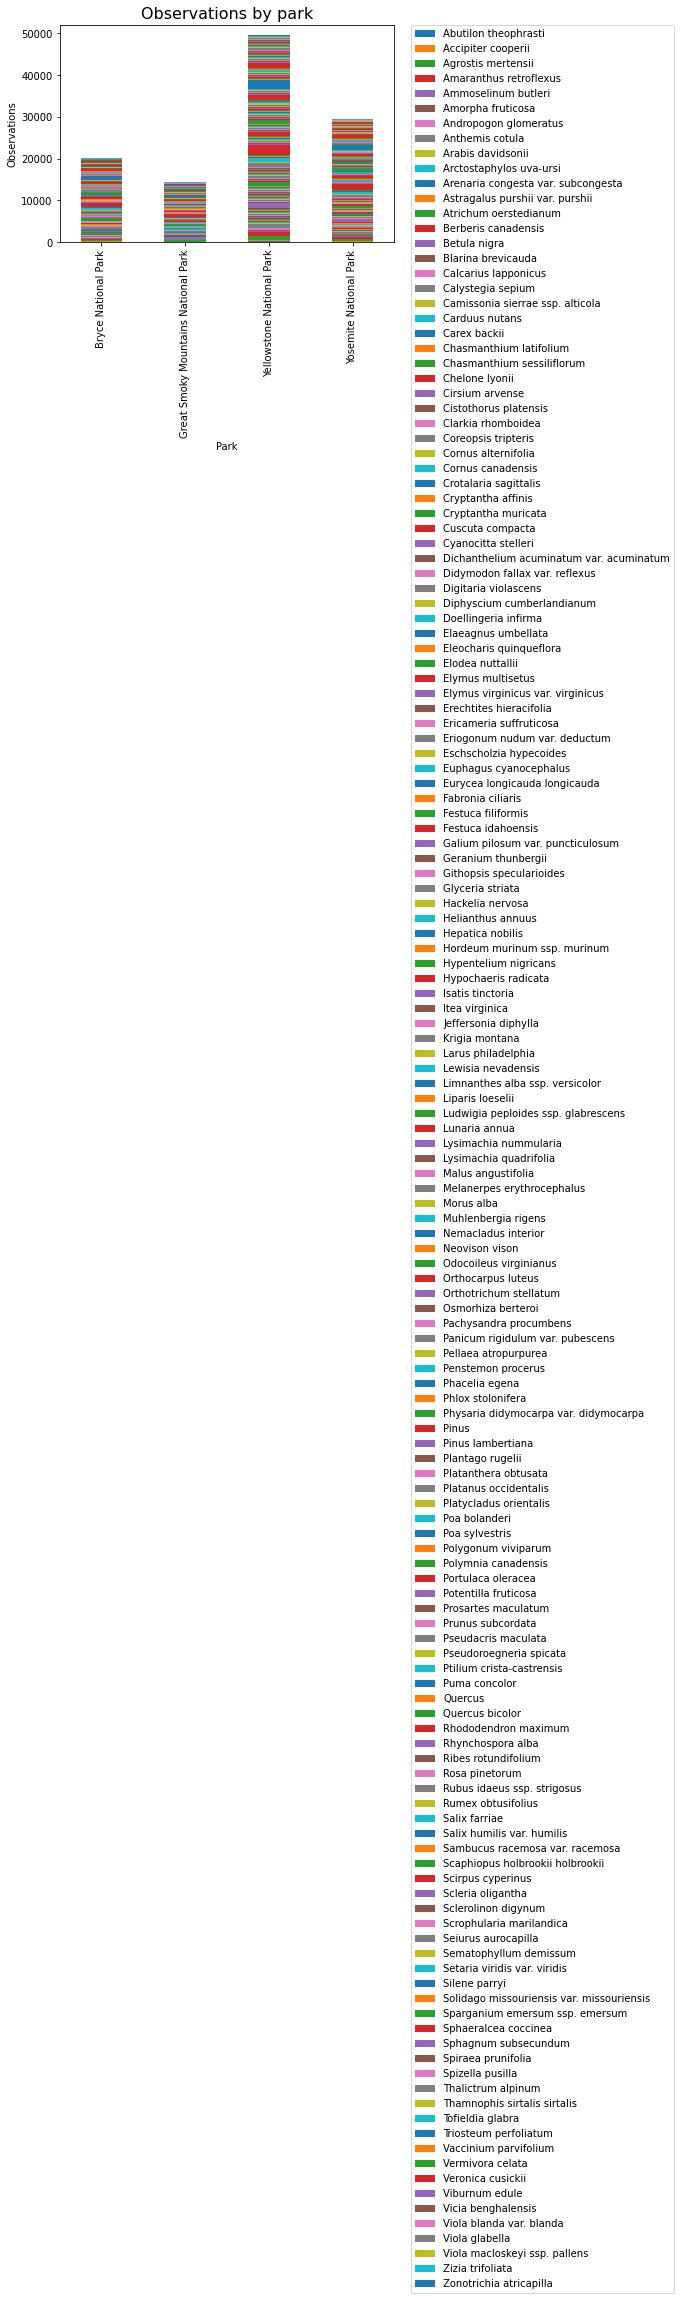

In [323]:
#Look at the first 800 species for the sake of demonstration.
observations_by_park = merged_df.head(800).groupby(['park_name','scientific_name'])['observations'].sum().unstack()

# Create the grouped bar chart
observations_by_park.plot(kind='bar', stacked=True)

# Customize the chart
plt.title('Observations by park', fontsize=16)
plt.xlabel('Park')
plt.ylabel('Observations')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.xticks(rotation=90)

# Show the plot
plt.show()

Needless to say, there are simply too many species within each park for us to get a clear sense of the data. Instead, it would be more fruitful to organize the data within fewer categories. Thus, we turn to the categories/genus for each species instead.

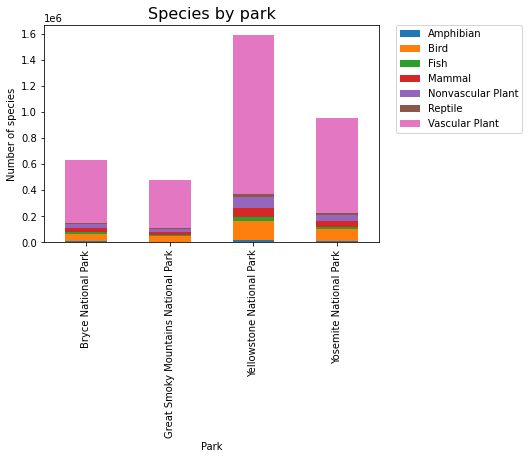

In [324]:
#Since the data will be more consise, we can work with the entire dataset instead of the first 800 species.
observations_by_park = merged_df.groupby(['park_name','category'])['observations'].sum().unstack()

# Create the grouped bar chart
observations_by_park.plot(kind='bar', stacked=True)

# Customize the chart (optional)
plt.title('Species by park', fontsize=16)
plt.xlabel('Park')
plt.ylabel('Number of species')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.xticks(rotation=90)

# Show the plot
plt.show()

Unsurprisingly, the diversity in (vascular) plant species outweight the other by a significant margin. However, it seems like the fauna in Yellowstone and Yosemite is particularly rich with many mammalian and avian species.

Another way to present this data is by creating a heatmap with seaborn.

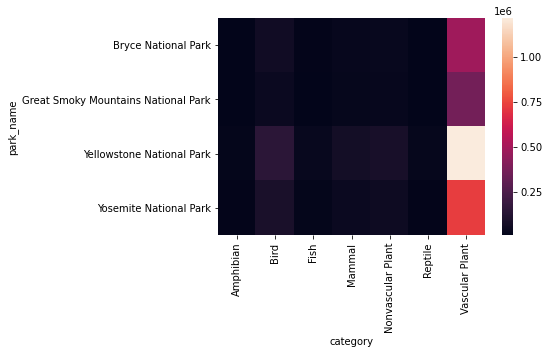

In [325]:
sns.heatmap(observations_by_park)

Again, we see that vascular plants are the cornerstone for each national park.

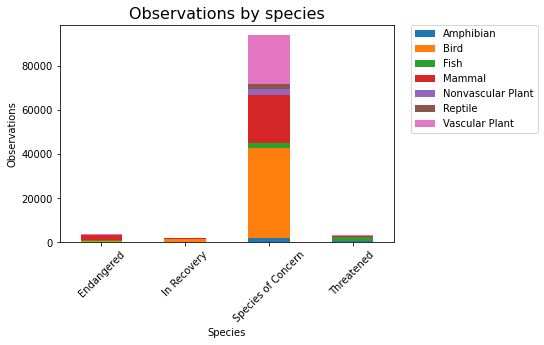

In [327]:
observations_by_conservation_status = merged_df.groupby(['conservation_status','category'])['observations'].sum().unstack()
observations_by_conservation_status.head(10).plot(kind='bar',stacked=True)

# Customize the chart (optional)
plt.title('Observations by species', fontsize=16)
plt.xlabel('Species')
plt.ylabel('Observations')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.xticks(rotation=45)

# Show the plot
plt.show()

Finally, we will look at the missing data that has been omitted from the data analysis until now. We replace the NaN/empty cells in the "category" column with a placeholder string, for example "Unknown", to incluse it in the plots.

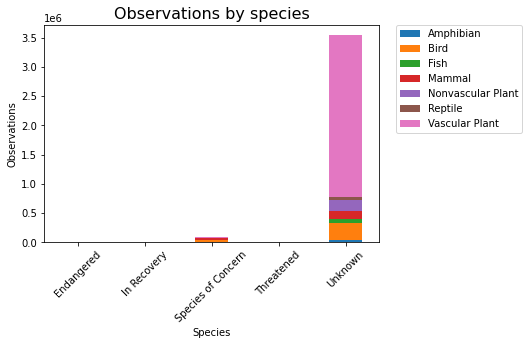

In [328]:
merged_df.fillna("Unknown",inplace=True)
#df['result'] = df['result'].str.replace(r'\D', '', regex=True).astype(float)
#df['result'] = df['result'].str.replace(r'\D', '', regex=True)
observations_by_conservation_status = merged_df.groupby(['conservation_status','category'])['observations'].sum().unstack()
observations_by_conservation_status.head(10).plot(kind='bar',stacked=True)

# Customize the chart (optional)
plt.title('Observations by species', fontsize=16)
plt.xlabel('Species')
plt.ylabel('Observations')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.xticks(rotation=45)

# Show the plot
plt.show()

By including the missing data we get a sense of the scope of this dataset. There are more than 3,5 million species included in the dataset but the conservation status for an overwhelming majority of them is simply missing. In all likelihood, this means that their population has been diminished so severely that it's difficult to properly tally.

It would perhaps not be an exagerration to rename the category to "Extinct".